# Problem set 1 

## 3) Equation of state

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# importing and labeling data from a hydrographic station in the Greenland Sea (70.03N, 2.83W)
column_names = ["P", "S", "T", "smoothed S", "smoothed T"]
# P: pressure [dbar] (1 dbar ~ 1 meter of depth)
# S: salinity [practical salinity scale]
# T: tempereaure in situ

df = pd.read_table("hydrodata.txt", names = column_names)
df

,P,S,T,smoothed S,smoothed T
0,6,34.256,3.405,34.692,0.89257
1,7,34.256,3.405,34.694,0.87736
2,8,34.256,3.405,34.696,0.86232
3,9,34.256,3.411,34.698,0.84711
4,10,34.257,3.408,34.699,0.83240
...,...,...,...,...,...
2515,2874,34.901,-1.060,34.901,-1.05960
2516,2875,34.901,-1.060,34.901,-1.05950
2517,2876,34.901,-1.060,34.901,-1.05930
2518,2877,34.901,-1.059,34.901,-1.05900


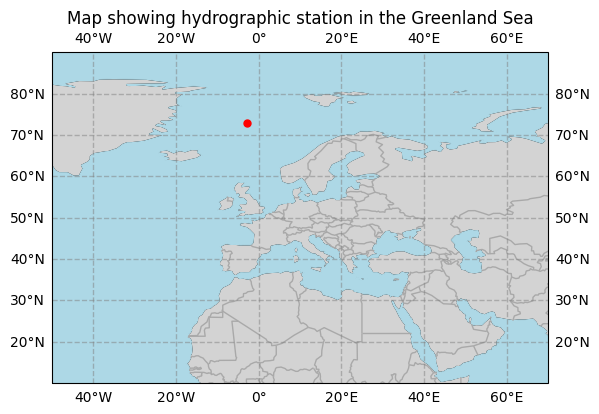

In [78]:
# import ssl

# # Disable SSL verification
# ssl._create_default_https_context = ssl._create_unverified_context

import cartopy.crs as ccrs
import cartopy.feature as cfeature

lon = -2.83    # longitude of measurement site
lat = 73.03    # latitude of measurement site
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# adding map features
ax.add_feature(cfeature.BORDERS, edgecolor = 'darkgray', linestyle='-')
ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor= 'lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor = 'lightblue', facecolor= 'lightblue')

# adding coordinate point
ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([-50, 70, 10, 90], ccrs.PlateCarree())
ax.set_title('Map showing hydrographic station in the Greenland Sea')
plt.show()

### 1.

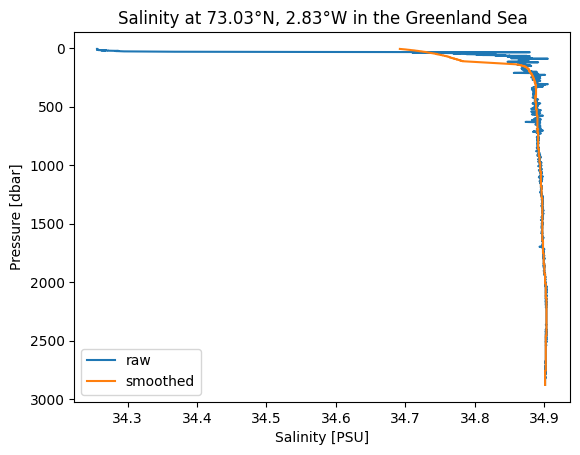

In [28]:
# Plotting salinity and pressure
plt.plot(df["S"], df["P"], label = "raw")
plt.plot(df["smoothed S"], df["P"], label = "smoothed")
plt.title("Salinity at 73.03\u00b0N, 2.83\u00b0W in the Greenland Sea")
plt.xlabel("Salinity [PSU]")
plt.ylabel("Pressure [dbar]")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

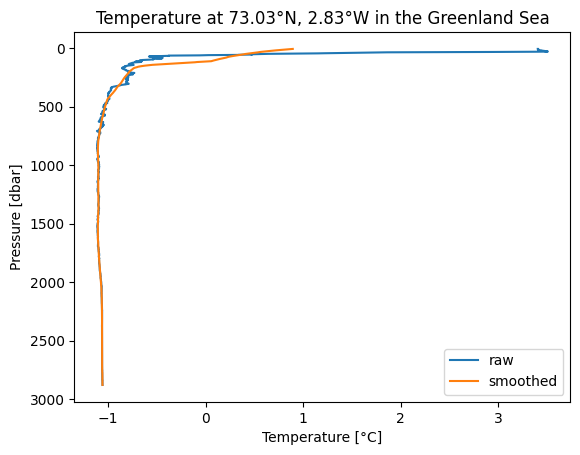

In [27]:
# Plotting temperature and pressure
plt.plot(df["T"], df["P"], label = "raw")
plt.plot(df["smoothed T"], df["P"], label = "smoothed")
plt.title("Temperature at 73.03\u00b0N, 2.83\u00b0W in the Greenland Sea")
plt.xlabel("Temperature [\u00b0C]")
plt.ylabel("Pressure [dbar]")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

### 2. 

We may observe artificial temperature increase at depth when looking at in situ temperature profiles due to ...

### 3. 

Potential temperature $\theta$, is the temperature the water would have if moved adiabatically from pressure $p$ to reference pressure $p_0$.

In [35]:
import gsw

p_ref = 0      # reference pressure
lon = -2.83    # longitude of measurement site
lat = 73.03    # latitude of measurement site

SP = list(df["smoothed S"]) # psu salinity
p = list(df["P"]) # pressure
ts = list(df["smoothed T"]) # in situ temperature

# calculate absolute salinity
SA = gsw.conversions.SA_from_SP(SP, p, lon, lat)

# calculate potential temperature pt
pt = gsw.conversions.pt_from_t(SA, ts, p, p_ref)

# calculate conservative temperature from in-situ temperature
CT = gsw.CT_from_t(SA, ts, p)

# calculate in-situ density
rho = gsw.density.rho(SA, CT, p)

# calculate potential density anomaly with reference pressure 0 dbar
# this being this particular potential density minus 1000 kg/m^3
sigma_theta = gsw.density.sigma0(SA, CT)
